<a href="https://colab.research.google.com/github/steimel60/ML/blob/main/DeepLearning/TabularData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
!pip install kaggle

     |████████████████████████████████| 719 kB 4.4 MB/s 
     |████████████████████████████████| 346 kB 15.9 MB/s 
     |████████████████████████████████| 197 kB 14.0 MB/s 
     |████████████████████████████████| 1.2 MB 26.9 MB/s 
     |████████████████████████████████| 4.2 MB 20.2 MB/s 
     |████████████████████████████████| 59 kB 7.3 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 140 kB 61.4 MB/s 
     |████████████████████████████████| 86 kB 3.8 MB/s 
     |████████████████████████████████| 212 kB 58.6 MB/s 
     |████████████████████████████████| 1.1 MB 70.5 MB/s 
     |████████████████████████████████| 596 kB 73.1 MB/s 
     |████████████████████████████████| 127 kB 79.6 MB/s 
     |████████████████████████████████| 271 kB 74.1 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 144 kB 67.9 MB/s 
     |████████████████████████████████| 112 kB 74.6 MB/s 
     |█████████████████

In [2]:
creds = '{"username":"dylansteimel","key":"b866f4bd21f4258d1089a99637b0af63"}'
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
  cred_path.parent.mkdir(exist_ok=True)
  cred_path.mk_write(creds)
  cred_path.chmod(0o600)

import kaggle
api = kaggle.api

In [3]:
def file_extract(fname, dest=None):
     "Extract `fname` to `dest` using `tarfile` or `zipfile`."
     if dest is None: dest = Path(fname).parent
     fname = str(fname)
     if   fname.endswith('gz'):  tarfile.open(fname, 'r:gz').extractall(dest)
     elif fname.endswith('zip'): zipfile.ZipFile(fname     ).extractall(dest)
     else: raise Exception(f'Unrecognized archive: {fname}')

In [4]:
path = Path('/content/bluebook')
if not path.exists():
  path.mkdir()
  kaggle.api.competition_download_cli('bluebook-for-bulldozers', path=path)
file_extract(path/'bluebook-for-bulldozers.zip')
path.ls(file_type='text')

100%|██████████| 48.4M/48.4M [00:00<00:00, 68.2MB/s]


(#7) [Path('/content/bluebook/Valid.csv'),Path('/content/bluebook/median_benchmark.csv'),Path('/content/bluebook/TrainAndValid.csv'),Path('/content/bluebook/ValidSolution.csv'),Path('/content/bluebook/Test.csv'),Path('/content/bluebook/Machine_Appendix.csv'),Path('/content/bluebook/random_forest_benchmark_test.csv')]

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [20]:
#View sizes
df['ProductSize'].unique()
df = add_datepart(df, 'saledate')

In [8]:
#Order the products by size
sizes = 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact'
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [9]:
#Kaggle tells us to us Root Mean Squared Log Error as our metric
#So we change our dependant variable - Sales Price - to it's log
dv = 'SalePrice'
df[dv] = np.log(df[dv])

Below we show how to use Neural Networks on tabular data

In [11]:
from fastai.tabular.all import *

In [13]:
df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dv] = np.log(df_nn[dv])
df_nn = add_datepart(df_nn, 'saledate')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [17]:
df_nn_final = df_nn[['YearMade', 'ProductSize', 'Coupler_System', 'fiProductClassDesc', 'ModelID',
                    'Hydraulics_Flow', 'fiSecondaryDesc', 'fiModelDesc', 'ProductGroup', 'Enclosure',
                    'Drive_System', 'Hydraulics', 'Tire_Size', 'saleElapsed', dv]]
cont_nn, cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dv)

In [21]:
procs_nn = [Categorify, FillMissing, Normalize] #Process data for nn
cond = (df.saleYear<2011) | (df.saleMonth<10)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx), list(valid_idx))
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn, splits=splits, y_names=dv)
dls = to_nn.dataloaders(1024)
y = to_nn.train.y
y.min(), y.max()

(8.465899467468262, 11.863582611083984)

SuggestedLRs(valley=0.0003311311302240938)

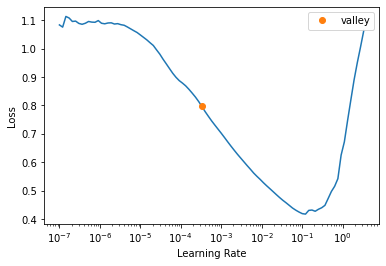

In [22]:
#Build nn with 2 layers of 500 and 250 activations
learn = tabular_learner(dls, y_range=(8,12), layers=[500,200], n_out=1, loss_func=F.mse_loss)
learn.lr_find()

In [23]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,0.060220,0.068404,00:04
1,0.051535,0.060002,00:04
2,0.046818,0.054591,00:04
3,0.042427,0.051086,00:04
4,0.039291,0.050629,00:04


In [25]:
preds,targs = learn.get_preds()
def r_mse(pred, y): return round(math.sqrt(((pred-y)**2).mean()), 6)
r_mse(preds,targs)

0.22501